# Tugas

In [15]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import hdbscan
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Buat model HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X_scaled)

# Simpan hasil ke DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['cluster'] = cluster_labels
df['true_label'] = y
df.head()


c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\sfati\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,true_label
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [17]:
# Hitung jumlah noise dan cluster
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = np.sum(cluster_labels == -1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Banyaknya noise:", n_noise)


Jumlah cluster terbentuk: 2
Banyaknya noise: 2


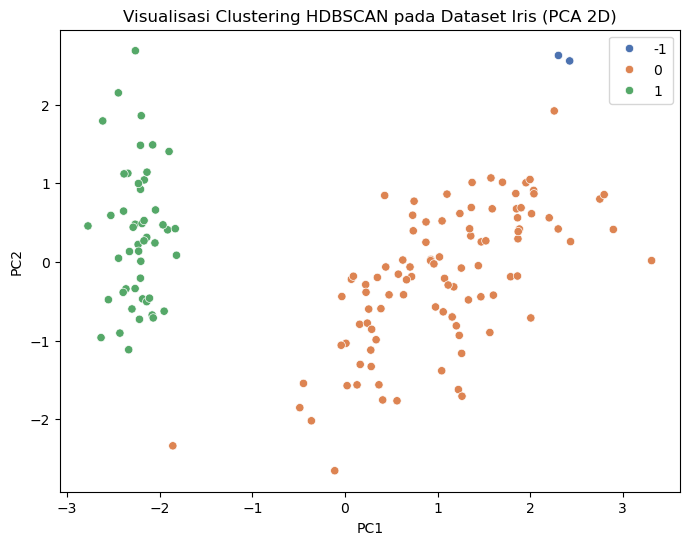

In [18]:
# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=cluster_labels,
    palette='deep',
    legend='full'
)
plt.title('Visualisasi Clustering HDBSCAN pada Dataset Iris (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


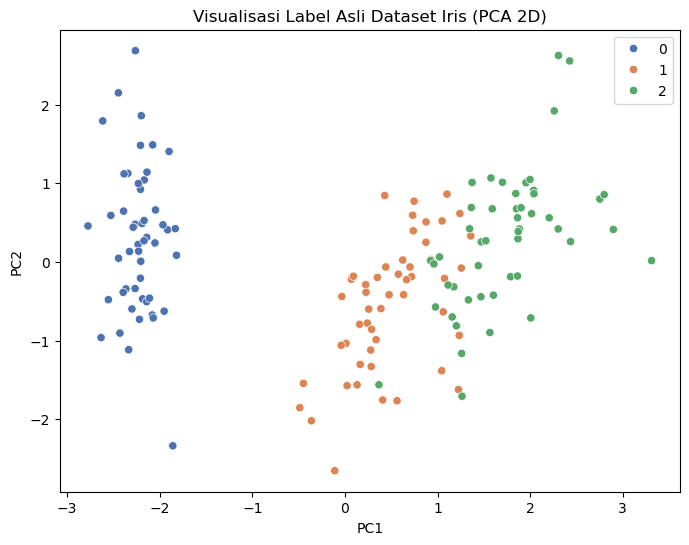

In [19]:
# Bandingkan dengan label asli
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=y,
    palette='deep',
    legend='full'
)
plt.title('Visualisasi Label Asli Dataset Iris (PCA 2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()